X shape: (13067, 400)
y shape: (13067,)


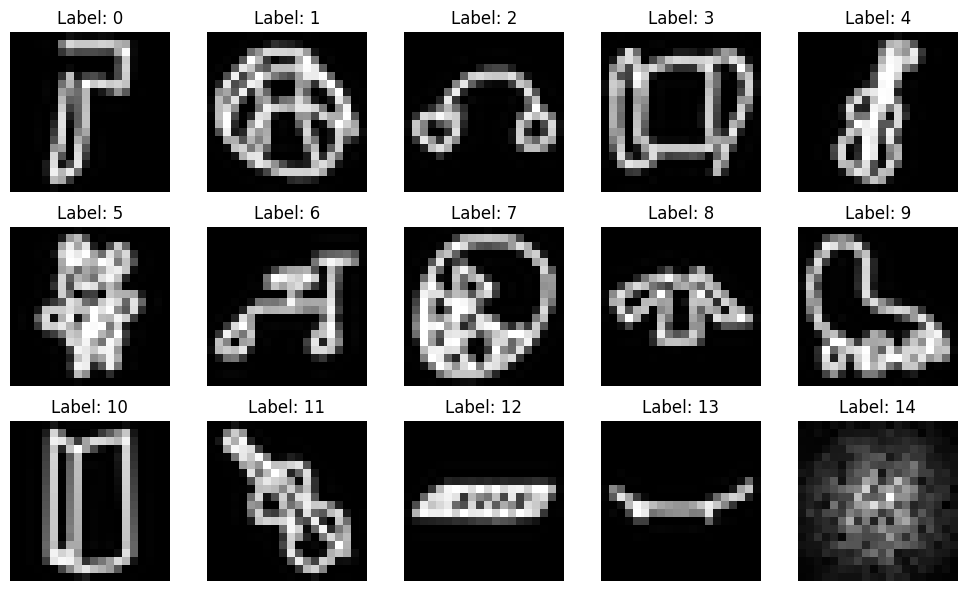

Antall klasser: 15
Fordeling: Counter({np.uint8(11): 1601, np.uint8(5): 1362, np.uint8(4): 1022, np.uint8(1): 900, np.uint8(8): 888, np.uint8(13): 884, np.uint8(14): 873, np.uint8(6): 858, np.uint8(9): 834, np.uint8(2): 804, np.uint8(10): 782, np.uint8(12): 702, np.uint8(7): 557, np.uint8(0): 546, np.uint8(3): 454})


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

data = np.load("dataset.npz")
X, y = data["X"], data["y"]

print("X shape:", X.shape)
print("y shape:", y.shape)

unique_labels = np.unique(y)

fig, axes = plt.subplots(3, 5, figsize=(10, 6))

for i, label in enumerate(unique_labels):
    idx = np.where(y == label)[0][0]
    ax = axes.flat[i]
    ax.imshow(X[idx].reshape(20, 20), cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis("off")

plt.tight_layout()
plt.show()

print("Antall klasser:", len(np.unique(y)))
print("Fordeling:", Counter(y))


In [5]:
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Problem 1


===== Logistic Regression =====
Best parameters: {'C': 0.1, 'penalty': 'l2'}
CV Accuracy: 0.7042002750452496
Test Accuracy: 0.6951032899770466
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       109
           1       0.52      0.56      0.54       180
           2       0.85      0.84      0.85       161
           3       0.37      0.24      0.29        91
           4       0.62      0.60      0.61       204
           5       0.76      0.79      0.77       273
           6       0.76      0.76      0.76       172
           7       0.49      0.32      0.38       111
           8       0.75      0.80      0.77       178
           9       0.80      0.77      0.78       167
          10       0.59      0.61      0.60       156
          11       0.64      0.68      0.66       320
          12       0.50      0.54      0.52       140
          13       0.74      0.85      0.79       177
          14       0.98      1.00      0.99  

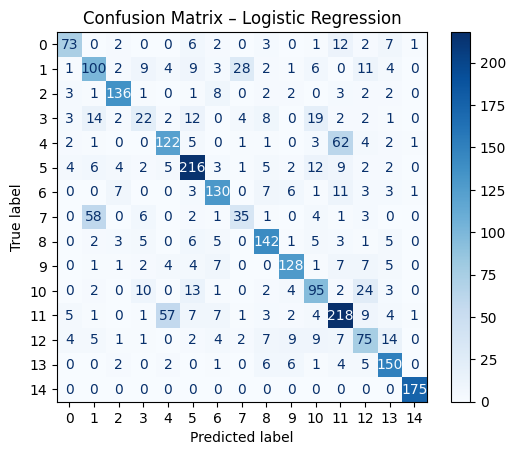

In [3]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, solver='saga', random_state= 42), param_grid_lr, cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

print("\n===== Logistic Regression =====")
print("Best parameters:", grid_lr.best_params_)
print("CV Accuracy:", grid_lr.best_score_)

y_pred_lr = best_lr.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_estimator(best_lr, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

fikk opp feil ang. convergence, muligens LR kunne vært enda bedre med flere iterasjoner men nekter å trene så lenge


===== SVM =====
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
CV Accuracy: 0.786952237774559
Test Accuracy: 0.7872991583779648
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.64      0.71      0.67       180
           2       0.92      0.88      0.90       161
           3       0.64      0.54      0.58        91
           4       0.60      0.58      0.59       204
           5       0.87      0.87      0.87       273
           6       0.87      0.90      0.88       172
           7       0.64      0.44      0.52       111
           8       0.91      0.88      0.89       178
           9       0.84      0.84      0.84       167
          10       0.78      0.83      0.80       156
          11       0.67      0.71      0.69       320
          12       0.72      0.75      0.73       140
          13       0.85      0.88      0.86       177
          14       1.00      1.00      1.00  

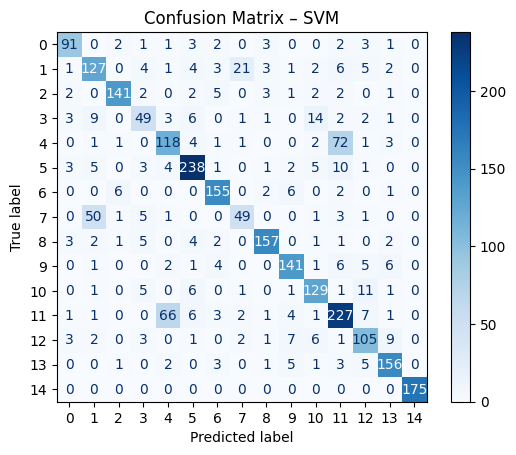

In [4]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_


print("\n===== SVM =====")
print("Best parameters:", grid_svm.best_params_)
print("CV Accuracy:", grid_svm.best_score_)

y_pred_svm = best_svm.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

ConfusionMatrixDisplay.from_estimator(best_svm, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix – SVM")
plt.show()

In [5]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Logistic Regression – test accuracy: {accuracy_lr:.3f}")
print(f"SVM – test accuracy: {accuracy_svm:.3f}")

Logistic Regression – test accuracy: 0.695
SVM – test accuracy: 0.787


Problem 2.

In [6]:
import pandas as pd
from sklearn.decomposition import PCA

start = time.time()
best_svm.fit(X_train, y_train)
end = time.time()
baseline_time = end - start

y_pred_base = best_svm.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred_base)
print(f"Baseline Accuracy: {baseline_acc:.4f}")
print(f"Baseline Training Time: {baseline_time:.4f} s")


k_values = [50, 100, 200, 300]
results = []

for k in k_values:
    print(f"=== PCA with {k} components ===")
    pca=PCA(n_components=k, random_state=42)
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    start = time.time()
    best_svm.fit(X_train_pca, y_train)
    end = time.time()
    train_time = end - start

    y_pred_pca = best_svm.predict(X_test_pca)
    svm_acc = accuracy_score(y_test, y_pred_pca)

    results.append({
        'k' : k,
        'SVM accuracy' : svm_acc,
        'Training time (s)': train_time
    })

table_results = pd.DataFrame(results)
table_results.loc[len(table_results)] = ['Baseline', baseline_acc, baseline_time]
print(table_results)

Baseline Accuracy: 0.7873
Baseline Training Time: 5.1151 s
=== PCA with 50 components ===
=== PCA with 100 components ===
=== PCA with 200 components ===
=== PCA with 300 components ===
          k  SVM accuracy  Training time (s)
0        50      0.802984           1.987897
1       100      0.798393           2.722730
2       200      0.793803           3.918131
3       300      0.792655           5.157379
4  Baseline      0.787299           5.115050


Acc burde ha gått ned med k, men tvert motsatt skjedde. Men siden datasettet inneholder mye støy og overlappende informasjon som med basketball og fotball, kutte ned k betyr at vi beholder de aller viktigste dimensjonene. vi oppnår høyere generalisering

In [13]:
X_clean_test, y_clean_test = X_test, y_test
X_clean_train, y_clean_train = X_train, y_train

data = np.load("dataset_corrupted.npz")
X_corrupted= data["X"]/255.0
print("X shape:", X_corrupted.shape)

X shape: (405, 400)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pca = PCA(n_components=50, random_state=42)
pca.fit(X_clean_train)

X_train_pca = pca.transform(X_clean_train)
X_corrupted_pca = pca.transform(X_corrupted)

svm_corr = SVC(C=10, kernel='rbf', gamma='scale', random_state=42)
svm_corr.fit(X_train_pca, y_clean_train)

In [35]:
X_proj = pca.inverse_transform(pca.transform(X_corrupted))
recon_pca = np.mean((X_corrupted - X_proj) ** 2, axis=1)

threshold_pca = np.percentile(recon_pca, 78)
flag_recon = recon_pca > threshold_pca

print(f"Threshold by PCA only : {threshold_pca:.4f}")
print(f"Flagged by PCA only: {flag_recon.sum()} / {len(flag_recon)}")

flag_pca = recon_pca > threshold_pca


Threshold by PCA only : 0.0512
Flagged by PCA only: 89 / 405


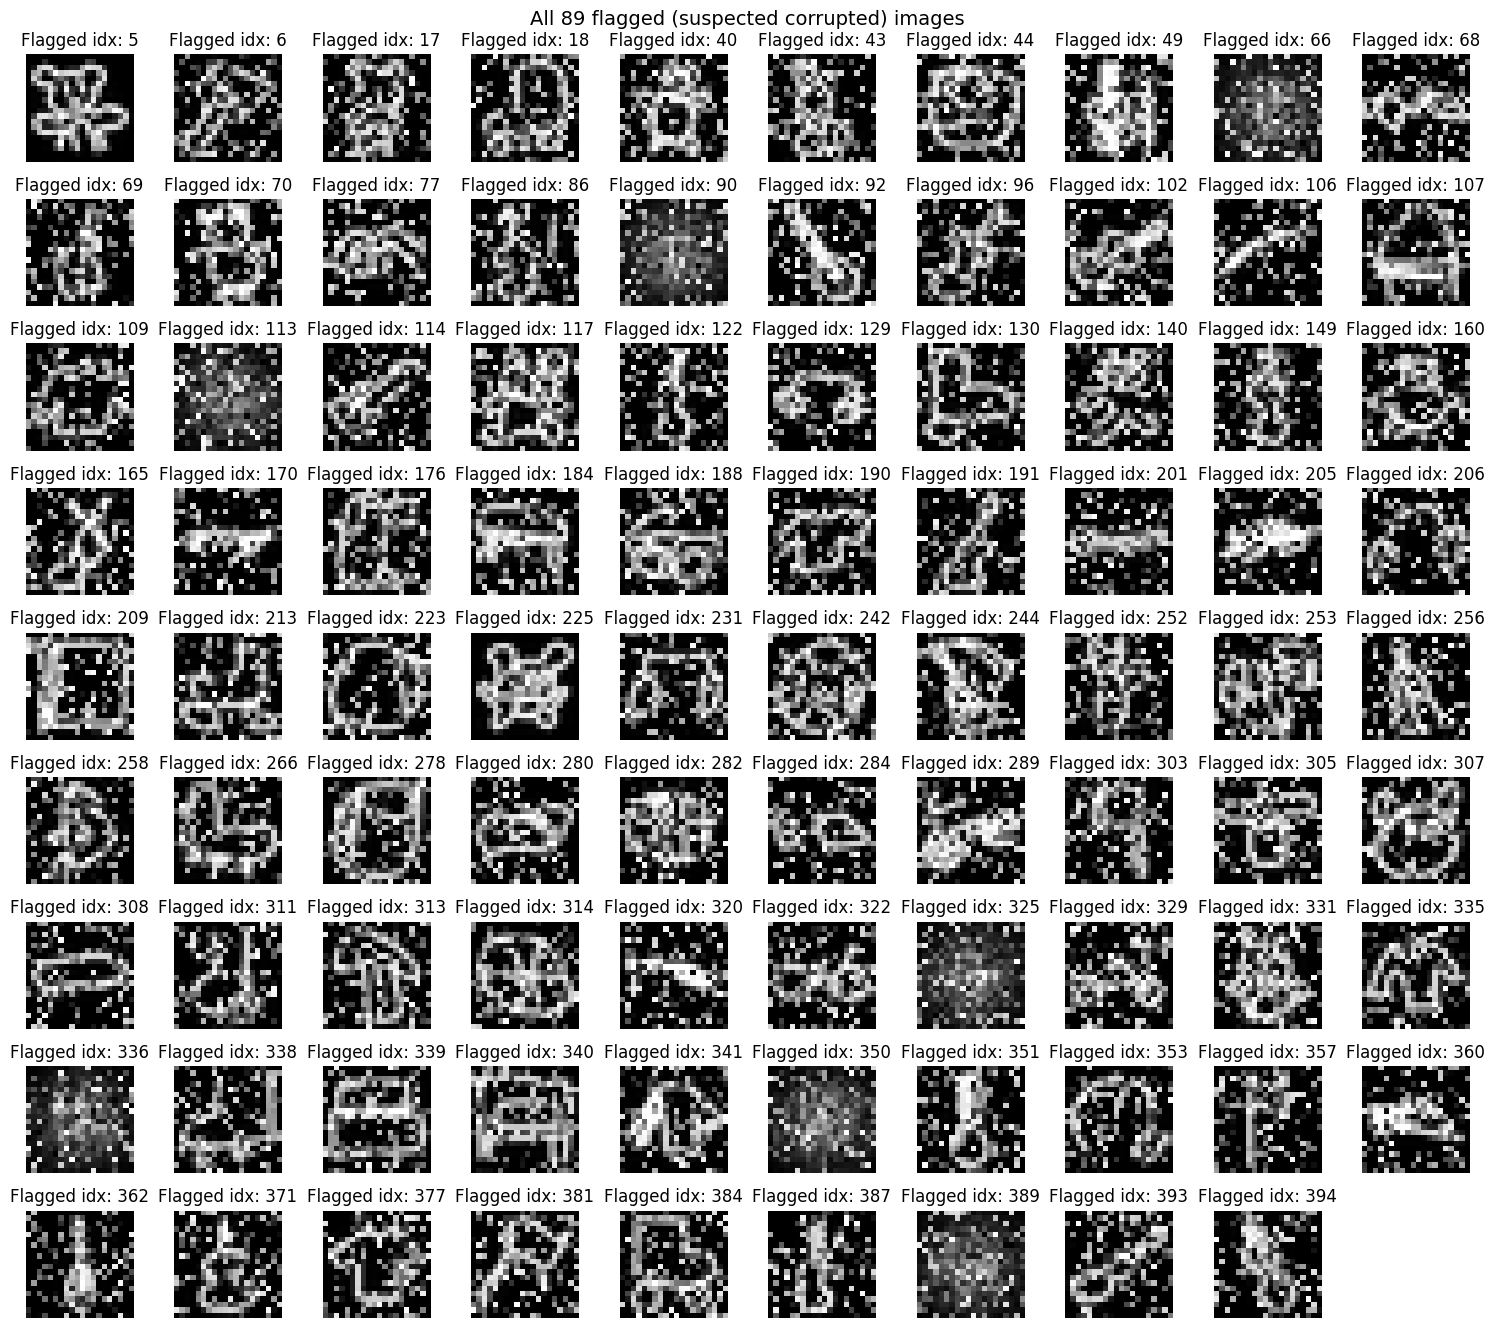

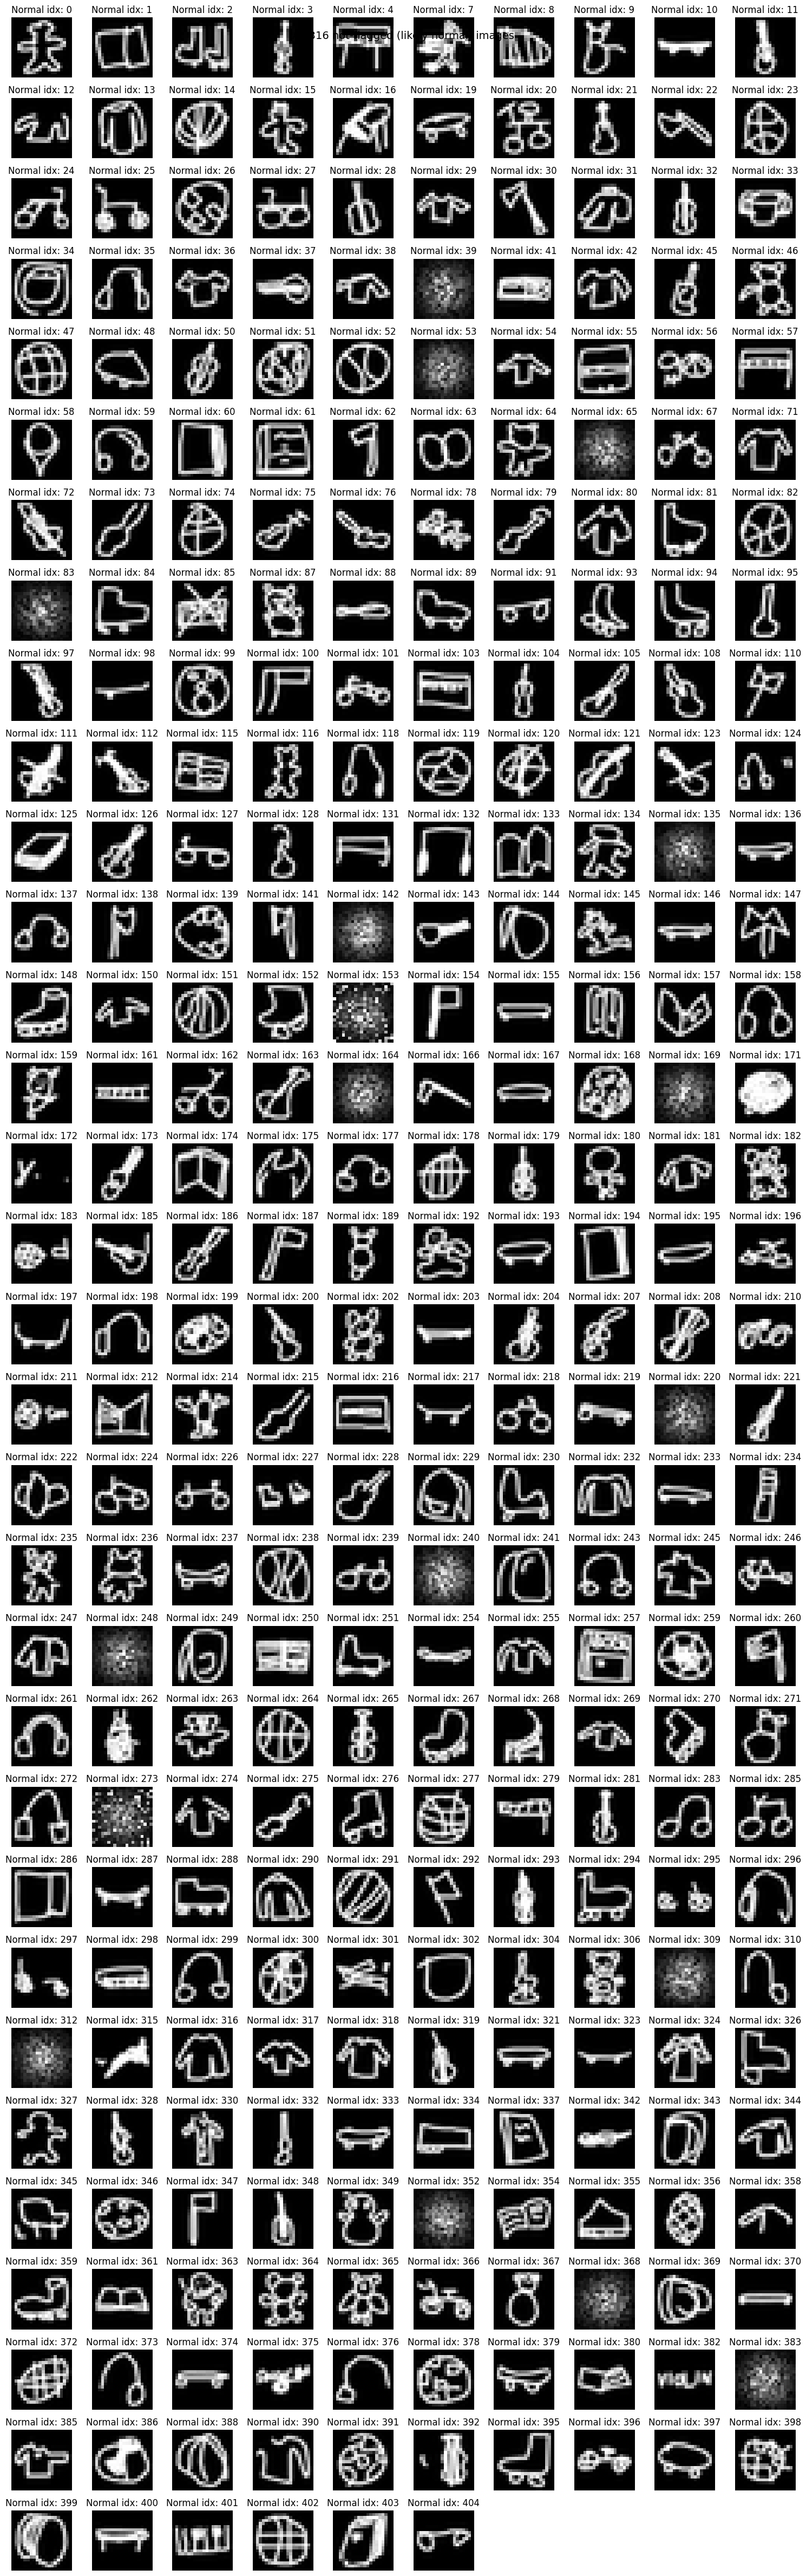

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math

flagged_indices = np.where(flag_pca)[0]
cols = 10
rows = math.ceil(len(flagged_indices) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
axes = axes.flatten()

for i, idx in enumerate(flagged_indices):
    axes[i].imshow(X_corrupted[idx].reshape(20, 20), cmap="gray")
    axes[i].set_title(f"Flagged idx: {idx}")
    axes[i].axis("off")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


not_flagged_indices = np.where(~flag_pca)[0]
cols = 10
rows = math.ceil(len(not_flagged_indices) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
axes = axes.flatten()

for i, idx in enumerate(not_flagged_indices):
    axes[i].imshow(X_corrupted[idx].reshape(20, 20), cmap="gray")
    axes[i].set_title(f"Normal idx: {idx}")
    axes[i].axis("off")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [45]:
svm_score_clean = np.max(np.abs(svm_corr.decision_function(X_train_pca)), axis=1)
svm_score_corr  = np.max(np.abs(svm_corr.decision_function(X_corrupted_pca)), axis=1)
threshold_svm = np.percentile(svm_score_clean, 22)
flag_svm = svm_score_corr <= threshold_svm

print(f"Threshold svm: {threshold_svm:.4f}")
print(f"Flagged svm: {flag_svm.sum()} / {len(flag_svm)}")

Threshold svm: 14.3133


TypeError: object of type 'numpy.bool' has no len()

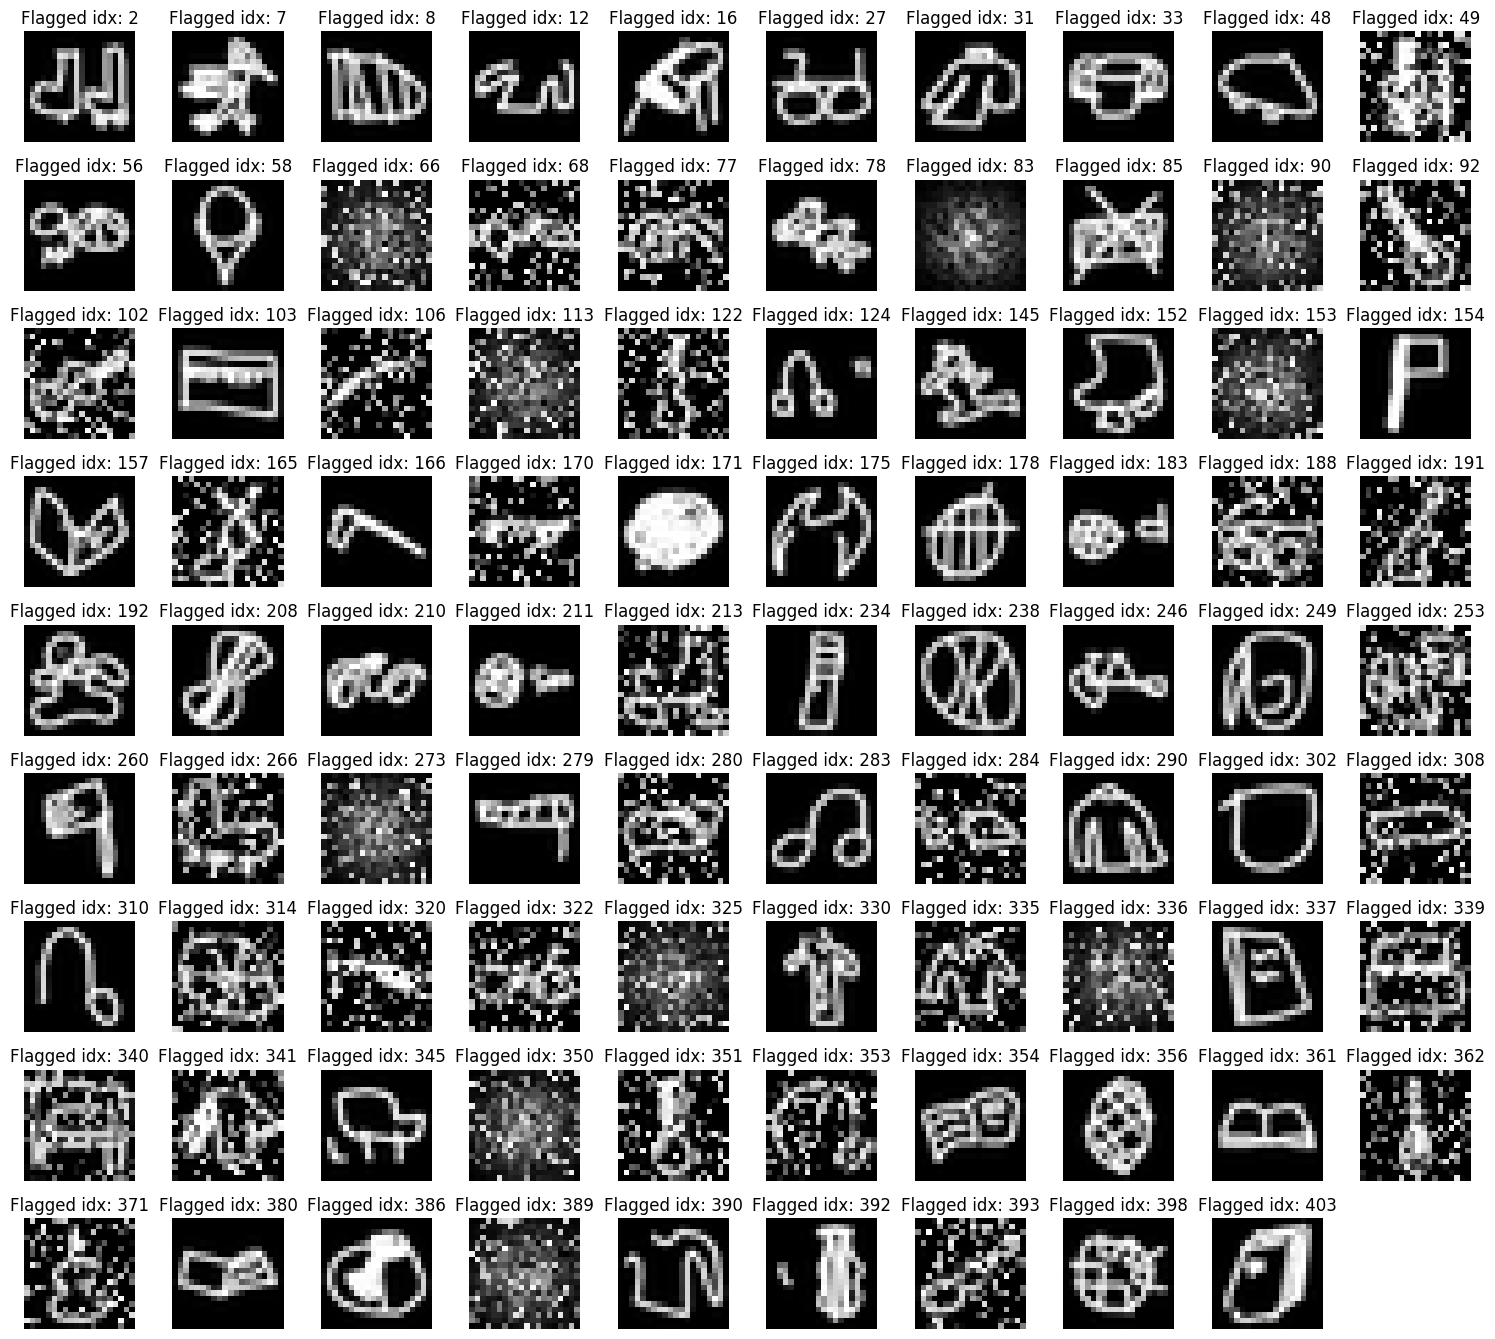

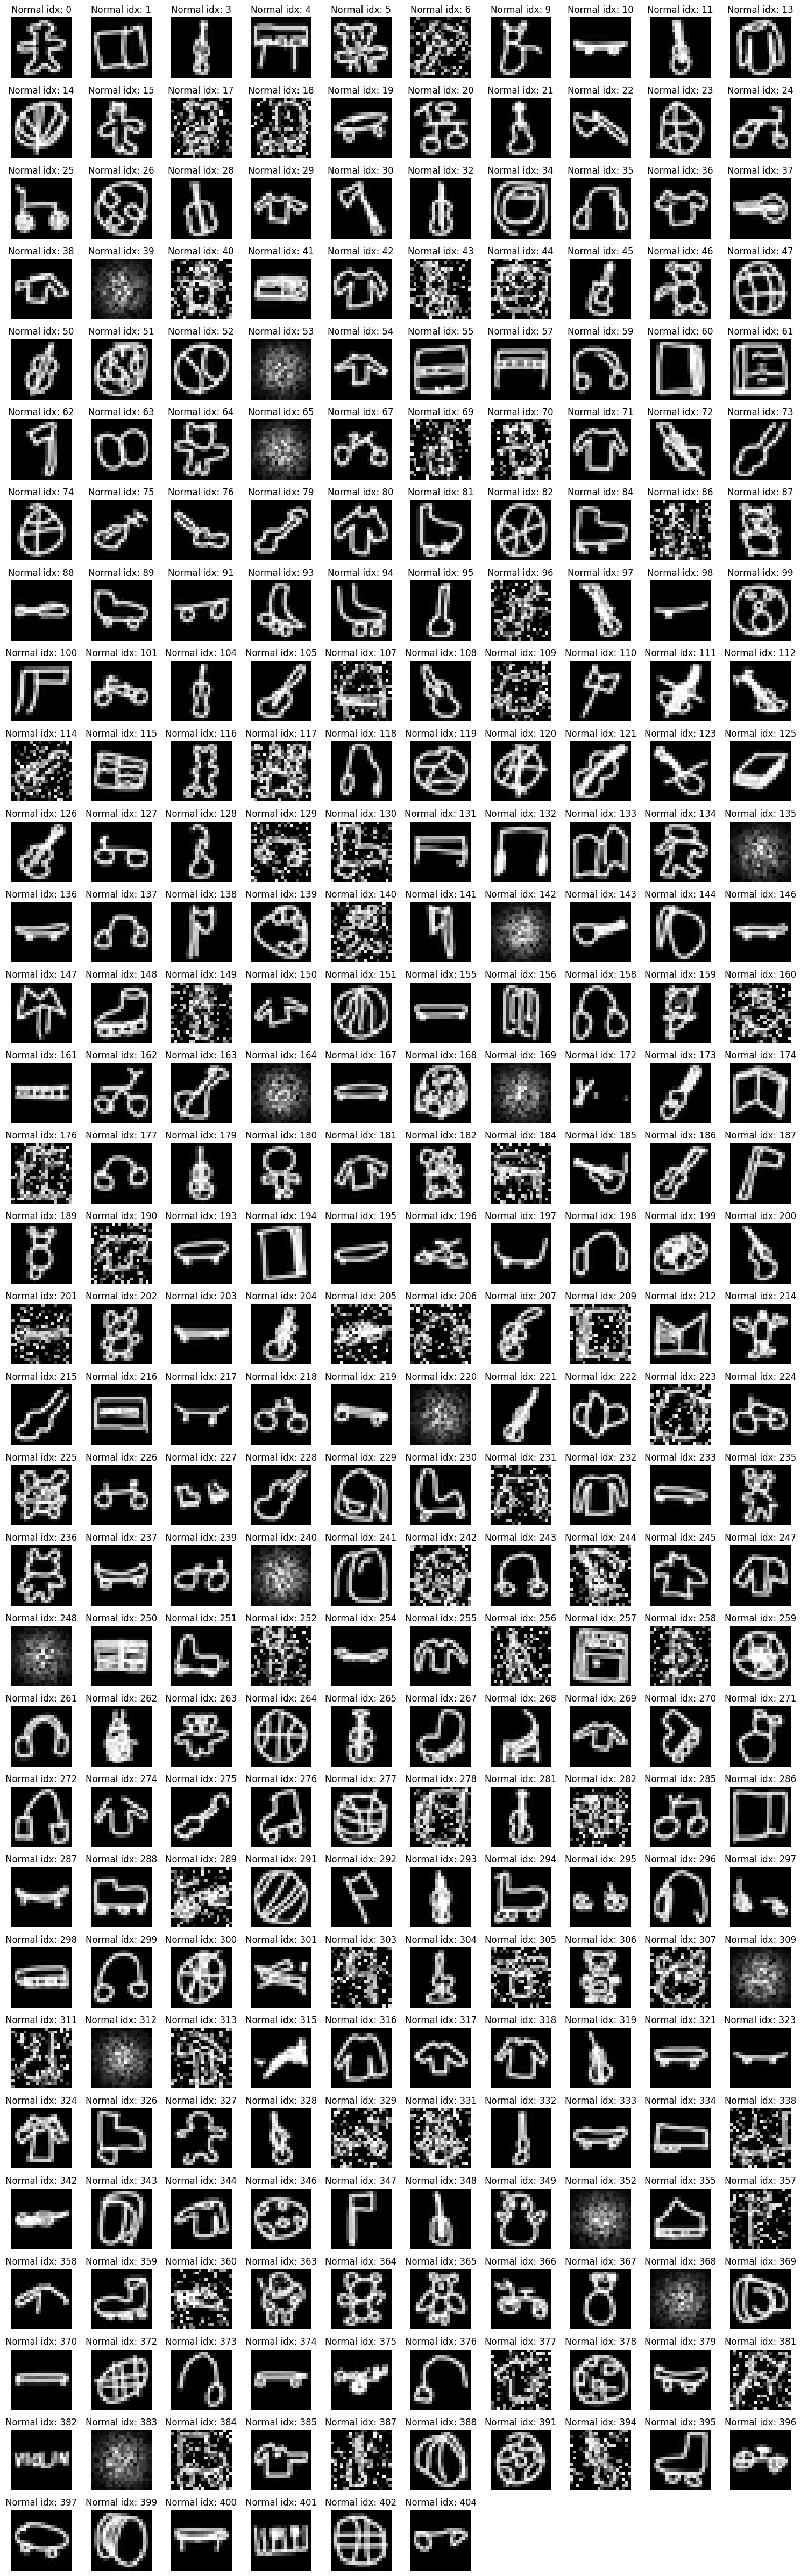

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math

flagged_indices = np.where(flag_svm)[0]
cols = 10
rows = math.ceil(len(flagged_indices) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
axes = axes.flatten()

for i, idx in enumerate(flagged_indices):
    axes[i].imshow(X_corrupted[idx].reshape(20, 20), cmap="gray")
    axes[i].set_title(f"Flagged idx: {idx}")
    axes[i].axis("off")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


not_flagged_indices = np.where(~flag_svm)[0]
cols = 10
rows = math.ceil(len(not_flagged_indices) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
axes = axes.flatten()

for i, idx in enumerate(not_flagged_indices):
    axes[i].imshow(X_corrupted[idx].reshape(20, 20), cmap="gray")
    axes[i].set_title(f"Normal idx: {idx}")
    axes[i].axis("off")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [41]:
combined_score = 0.5 * (svm_score_corr / svm_score_corr.max()) + 0.5 * (1 / (1 + recon_pca))
threshold_comb = np.percentile(combined_score, 22)
flag_combined = combined_score <= threshold_comb

print(f"Threshold combined: {threshold_comb:.4f}")
print(f"Flagged combined: {flag_combined.sum()} / {len(flag_combined)}")

Threshold combined: 0.9731
Flagged combined: 89 / 405


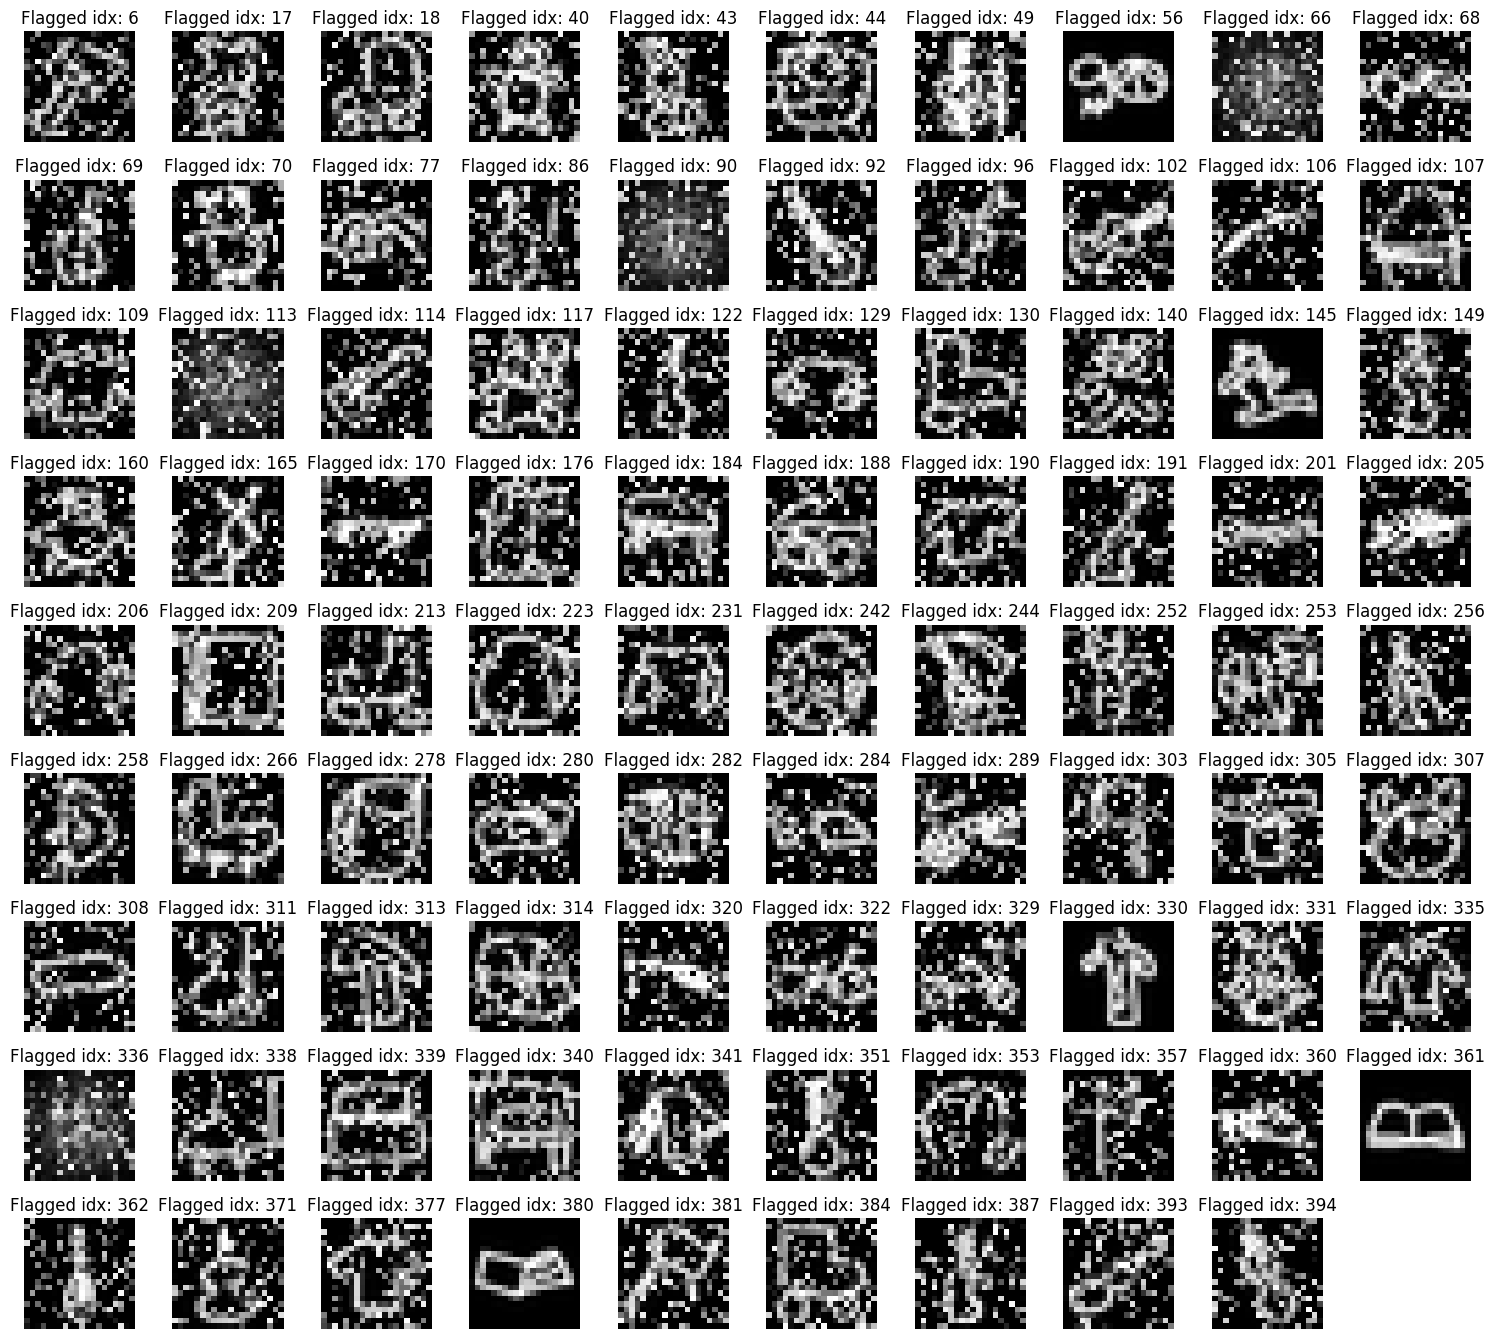

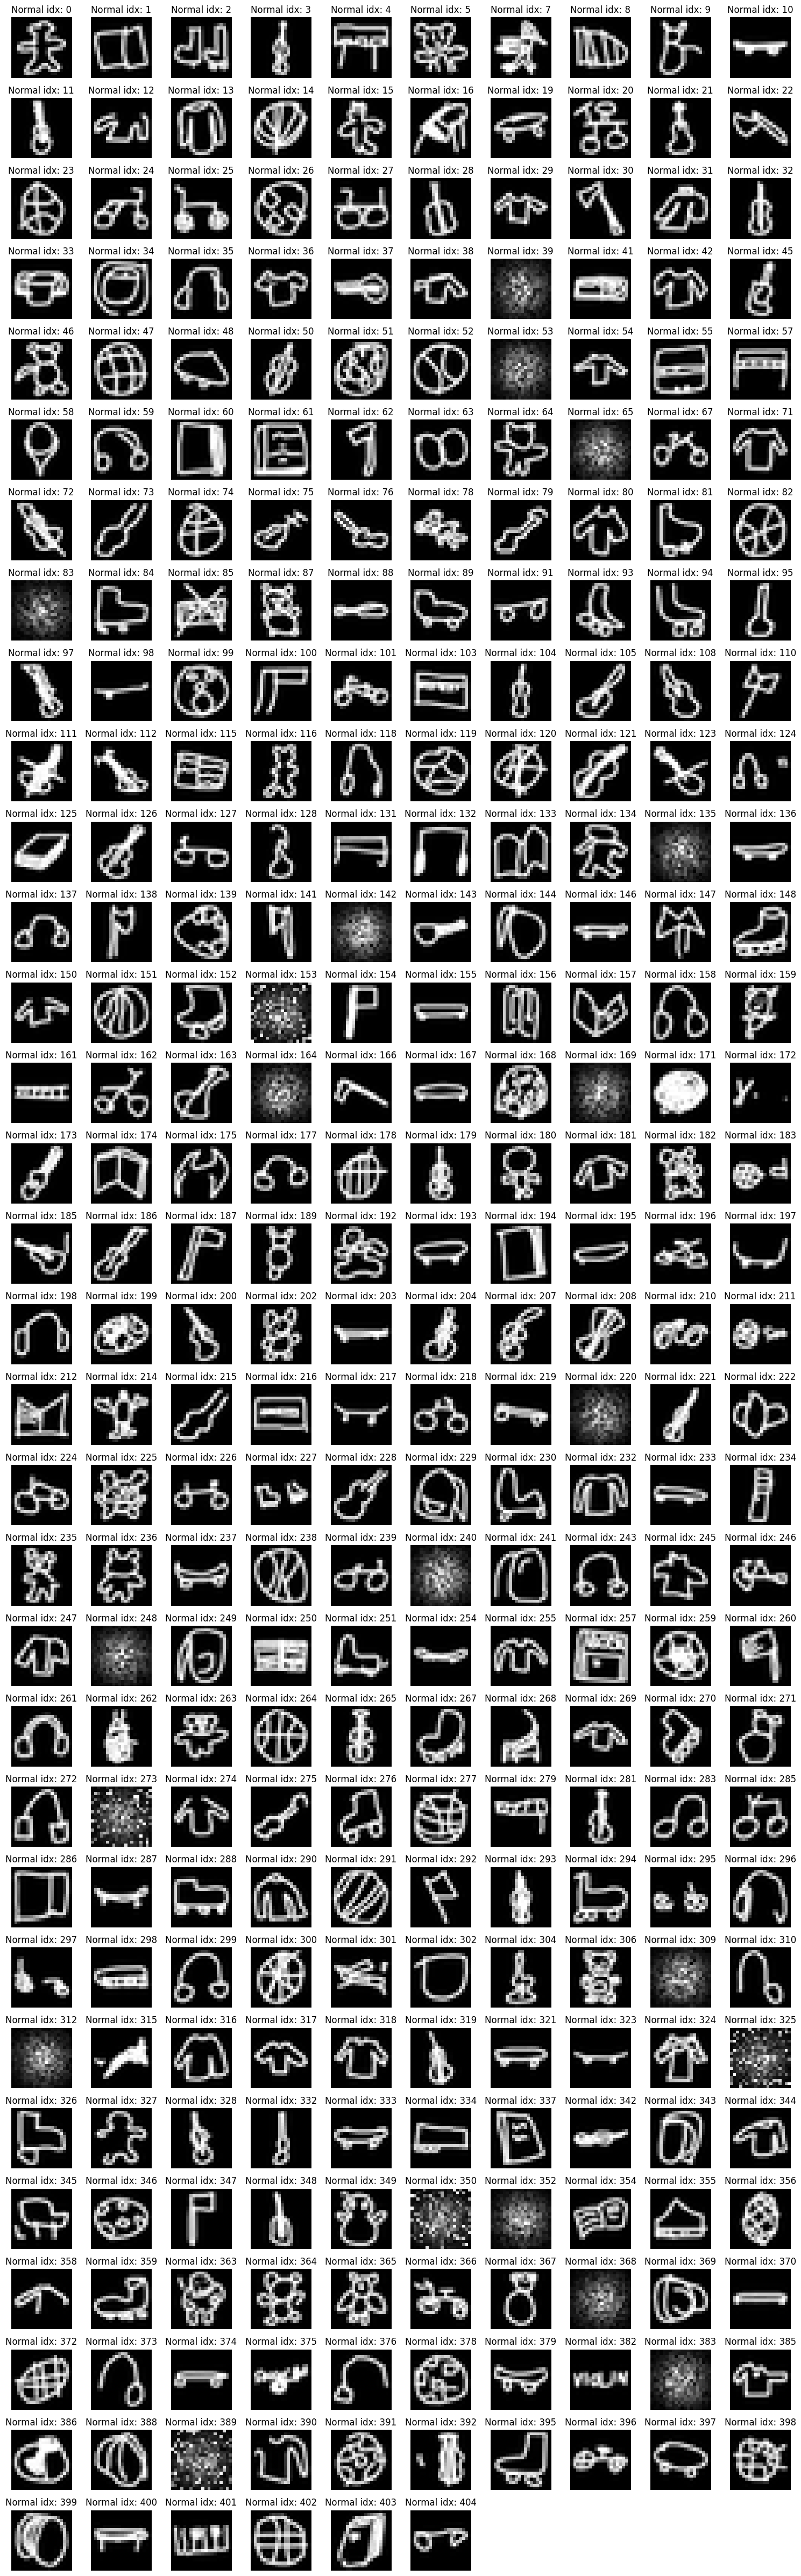

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math

flagged_indices = np.where(flag_combined)[0]
cols = 10
rows = math.ceil(len(flagged_indices) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
axes = axes.flatten()

for i, idx in enumerate(flagged_indices):
    axes[i].imshow(X_corrupted[idx].reshape(20, 20), cmap="gray")
    axes[i].set_title(f"Flagged idx: {idx}")
    axes[i].axis("off")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


not_flagged_indices = np.where(~flag_combined)[0]
cols = 10
rows = math.ceil(len(not_flagged_indices) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
axes = axes.flatten()

for i, idx in enumerate(not_flagged_indices):
    axes[i].imshow(X_corrupted[idx].reshape(20, 20), cmap="gray")
    axes[i].set_title(f"Normal idx: {idx}")
    axes[i].axis("off")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()